In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xTrain = sc.fit_transform(xTrain)
xTest = sc.transform(xTest)

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
# Fitting SVM to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(10, criterion = 'entropy', random_state = 0)
classifier.fit(xTrain, yTrain)

# Predicting the Test set results
yPredicted = classifier.predict(xTest)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, yPredicted)
print(cm)

[[63  5]
 [ 3 29]]


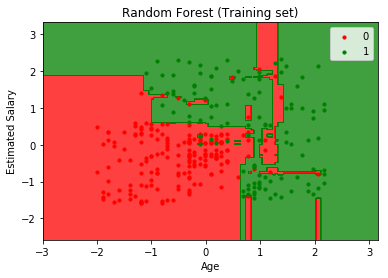

In [4]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
xSet, ySet = xTrain, yTrain
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1], s = 10,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

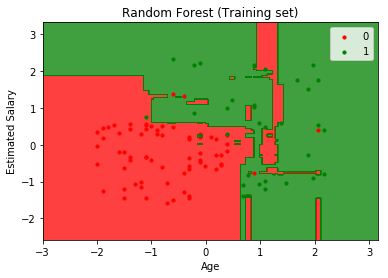

In [5]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
xSet, ySet = xTest, yTest
x1, x2 = np.meshgrid(np.arange(start = xSet[:, 0].min() - 1, stop = xSet[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xSet[:, 1].min() - 1, stop = xSet[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(ySet)):
    plt.scatter(xSet[ySet == j, 0], xSet[ySet == j, 1], s = 10,
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()